In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

In [2]:
data = pd.read_csv("/content/network_data_collection.csv")

In [3]:
data = pd.DataFrame(data)

In [4]:
data.head(10)

,Time,result,table,_start,_stop,_time,_measurement,dst_ip,protocol,src_ip,...,packet_length_bytes,retransmission,session_duration_sec,tcp_dst_port,tcp_src_port,time_delta_ms,total_data_mb,ttl,window_size,tcp_flags
0,2024-12-01 06:02:46.585157+00:00,_result,0,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:46.585157+00:00,network_metrics,0,IAP,0,...,0.00,0,18.02,443.0,443.0,5.26,0.77,0.480315,0.007813,NaN
1,2024-12-01 06:03:07.283963+00:00,_result,1,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.283963+00:00,network_metrics,0,MDNS,0,...,0.01,0,20.48,443.0,443.0,112.30,1.45,0.480315,0.007645,NaN
2,2024-12-01 06:03:07.663857+00:00,_result,2,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.663857+00:00,network_metrics,134743044,TCP,2886800586,...,0.00,0,18.88,443.0,50625.0,0.13,7.25,0.500000,0.007782,0.636364
3,2024-12-01 06:02:47.347695+00:00,_result,3,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.347695+00:00,network_metrics,134743044,TLSv1.3,2886800586,...,0.03,0,19.41,443.0,50235.0,673.57,15.16,0.500000,0.007782,0.956522
4,2024-12-01 06:03:07.686791+00:00,_result,4,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.686791+00:00,network_metrics,134744072,DNS,2886800586,...,0.01,0,10.13,443.0,443.0,85.07,0.15,0.500000,0.007645,NaN
5,2024-12-01 06:02:47.371166+00:00,_result,5,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.371166+00:00,network_metrics,134744072,TCP,2886800586,...,0.00,0,3.57,443.0,50321.0,3.34,5.74,0.500000,0.980240,0.000000
6,2024-12-01 06:02:47.629368+00:00,_result,6,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.629368+00:00,network_metrics,1729119882,TCP,2886800586,...,0.00,0,1.08,443.0,50267.0,0.84,2.82,0.500000,0.980240,0.000000
7,2024-12-01 06:03:07.974591+00:00,_result,6,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:03:07.974591+00:00,network_metrics,1729119882,TCP,2886800586,...,0.00,0,0.18,443.0,50954.0,0.97,2.77,0.500000,0.980240,0.000000
8,2024-12-01 06:02:47.646294+00:00,_result,7,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.646294+00:00,network_metrics,1978658913,TCP,2886800586,...,0.00,0,0.02,443.0,64042.0,99.86,0.00,0.500000,0.015625,0.652174
9,2024-12-01 06:02:47.667130+00:00,_result,8,2024-12-01 06:02:46.048958+00:00,2024-12-01 06:03:46.048958+00:00,2024-12-01 06:02:47.667130+00:00,network_metrics,1978658930,TCP,2886800586,...,0.00,0,1.04,443.0,50263.0,0.78,7.44,0.500000,0.980240,0.000000


In [ ]:
data.isnull().sum()

,0
Time,0
result,0
table,0
_start,0
_stop,0
_time,0
_measurement,0
dst_ip,0
protocol,0
src_ip,0


In [ ]:
data.columns

Index(['Time', 'result', 'table', '_start', '_stop', '_time', '_measurement',
       'dst_ip', 'protocol', 'src_ip', 'ack_rtt_ms', 'avg_latency_ms',
       'bandwidth_mbps', 'jitter_ms', 'packet_length_bytes', 'retransmission',
       'session_duration_sec', 'tcp_dst_port', 'tcp_src_port', 'time_delta_ms',
       'total_data_mb', 'ttl', 'window_size', 'tcp_flags'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  27169 non-null  object 
 1   result                27169 non-null  object 
 2   table                 27169 non-null  int64  
 3   _start                27169 non-null  object 
 4   _stop                 27169 non-null  object 
 5   _time                 27169 non-null  object 
 6   _measurement          27169 non-null  object 
 7   dst_ip                27169 non-null  int64  
 8   protocol              27169 non-null  object 
 9   src_ip                27169 non-null  int64  
 10  ack_rtt_ms            27169 non-null  float64
 11  avg_latency_ms        27169 non-null  float64
 12  bandwidth_mbps        27169 non-null  float64
 13  jitter_ms             23006 non-null  float64
 14  packet_length_bytes   27169 non-null  float64
 15  retransmission     

In [ ]:
data.isnull().sum()

,0
Time,0
result,0
table,0
_start,0
_stop,0
_time,0
_measurement,0
dst_ip,0
protocol,0
src_ip,0


In [5]:
data = data.dropna(subset=['src_ip', 'dst_ip'])
data['ack_rtt_ms'] = pd.to_numeric(data['ack_rtt_ms'], errors='coerce')
data['ttl'] = pd.to_numeric(data['ttl'], errors='coerce')
data['tcp_src_port'] = pd.to_numeric(data['tcp_src_port'], errors='coerce')
data['tcp_dst_port'] = pd.to_numeric(data['tcp_dst_port'], errors='coerce')
data['window_size'] = pd.to_numeric(data['window_size'], errors='coerce')
data['time_delta_ms'] = pd.to_numeric(data['time_delta_ms'], errors='coerce')
data['packet_length_bytes'] = pd.to_numeric(data['packet_length_bytes'], errors='coerce')
data['retransmission'] = pd.to_numeric(data['retransmission'], errors='coerce')
data['retransmission'] = data['retransmission'].notnull().astype(int)

In [6]:
data.isnull().sum()

,0
Time,0
result,0
table,0
_start,0
_stop,0
_time,0
_measurement,0
dst_ip,0
protocol,0
src_ip,0


In [7]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data[['jitter_ms', 'tcp_flags']] = mode_imputer.fit_transform(
    data[['jitter_ms', 'tcp_flags']]
)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Time                  27169 non-null  object 
 1   result                27169 non-null  object 
 2   table                 27169 non-null  int64  
 3   _start                27169 non-null  object 
 4   _stop                 27169 non-null  object 
 5   _time                 27169 non-null  object 
 6   _measurement          27169 non-null  object 
 7   dst_ip                27169 non-null  int64  
 8   protocol              27169 non-null  object 
 9   src_ip                27169 non-null  int64  
 10  ack_rtt_ms            27169 non-null  float64
 11  avg_latency_ms        27169 non-null  float64
 12  bandwidth_mbps        27169 non-null  float64
 13  jitter_ms             27169 non-null  float64
 14  packet_length_bytes   27169 non-null  float64
 15  retransmission     

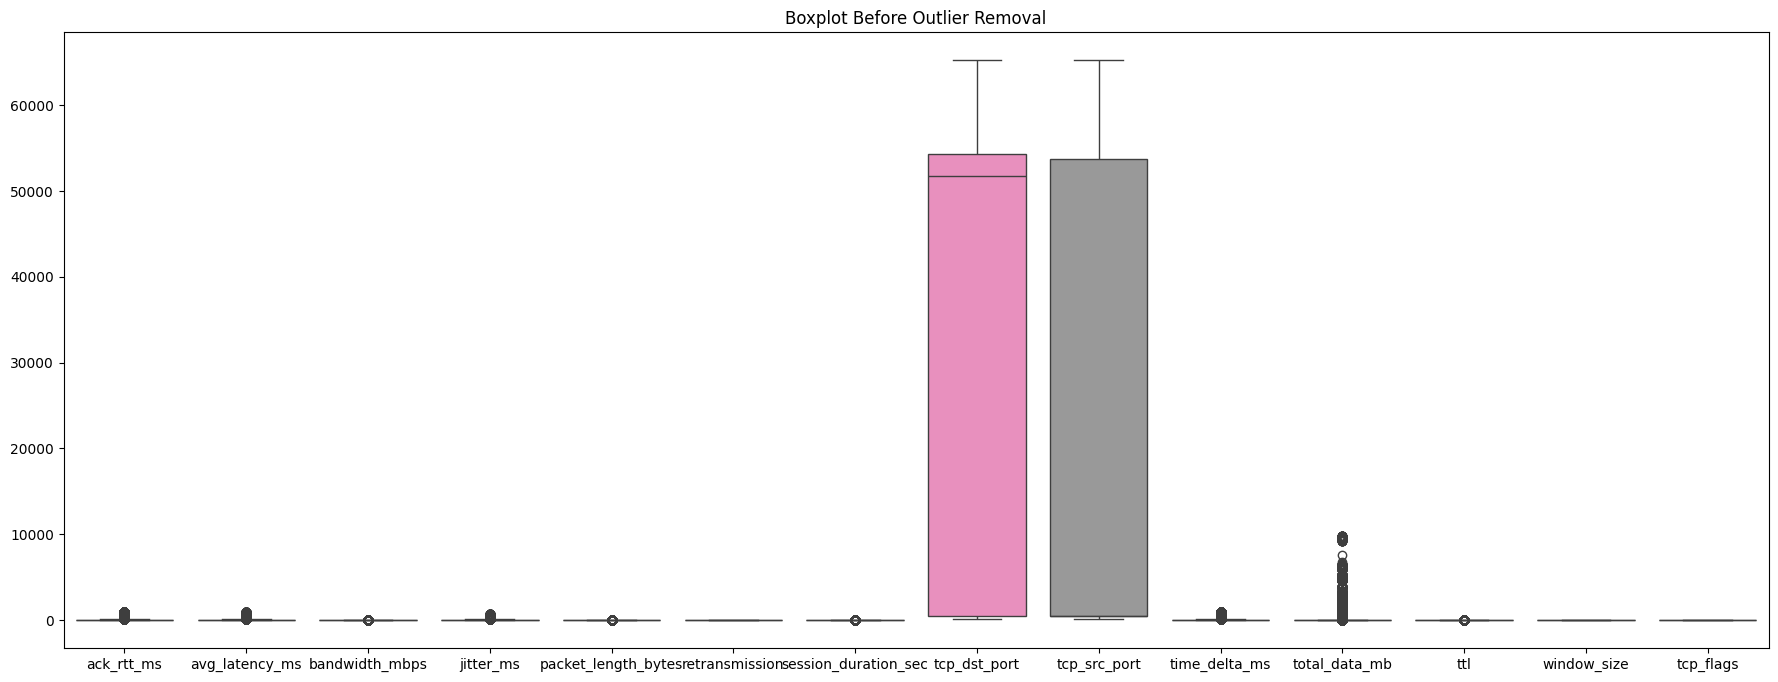

In [ ]:
features = ['ack_rtt_ms', 'avg_latency_ms',
       'bandwidth_mbps', 'jitter_ms', 'packet_length_bytes', 'retransmission',
       'session_duration_sec', 'tcp_dst_port', 'tcp_src_port', 'time_delta_ms',
       'total_data_mb', 'ttl', 'window_size', 'tcp_flags']

plt.figure(figsize=(22, 8))
sns.boxplot(data=data[features], palette="Set1")
plt.title("Boxplot Before Outlier Removal")
plt.show()

In [8]:
data = data.select_dtypes(include=['number'])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   table                 27169 non-null  int64  
 1   dst_ip                27169 non-null  int64  
 2   src_ip                27169 non-null  int64  
 3   ack_rtt_ms            27169 non-null  float64
 4   avg_latency_ms        27169 non-null  float64
 5   bandwidth_mbps        27169 non-null  float64
 6   jitter_ms             27169 non-null  float64
 7   packet_length_bytes   27169 non-null  float64
 8   retransmission        27169 non-null  int64  
 9   session_duration_sec  27169 non-null  float64
 10  tcp_dst_port          27169 non-null  float64
 11  tcp_src_port          27169 non-null  float64
 12  time_delta_ms         27169 non-null  float64
 13  total_data_mb         27169 non-null  float64
 14  ttl                   27169 non-null  float64
 15  window_size        

In [9]:
#rom sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=[np.number])),
                                columns=data.select_dtypes(include=[np.number]).columns)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   table                 27169 non-null  float64
 1   dst_ip                27169 non-null  float64
 2   src_ip                27169 non-null  float64
 3   ack_rtt_ms            27169 non-null  float64
 4   avg_latency_ms        27169 non-null  float64
 5   bandwidth_mbps        27169 non-null  float64
 6   jitter_ms             27169 non-null  float64
 7   packet_length_bytes   27169 non-null  float64
 8   retransmission        27169 non-null  float64
 9   session_duration_sec  27169 non-null  float64
 10  tcp_dst_port          27169 non-null  float64
 11  tcp_src_port          27169 non-null  float64
 12  time_delta_ms         27169 non-null  float64
 13  total_data_mb         27169 non-null  float64
 14  ttl                   27169 non-null  float64
 15  window_size        

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_data = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Check explained variance
print(f"Explained variance by components: {pca.explained_variance_ratio_}")


Explained variance by components: [0.19317868 0.14222181]


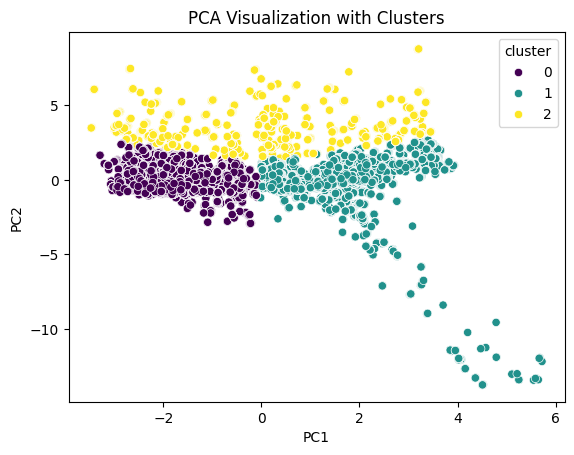

In [12]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='cluster', palette='viridis')
plt.title('PCA Visualization with Clusters')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

score = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6007679100873502


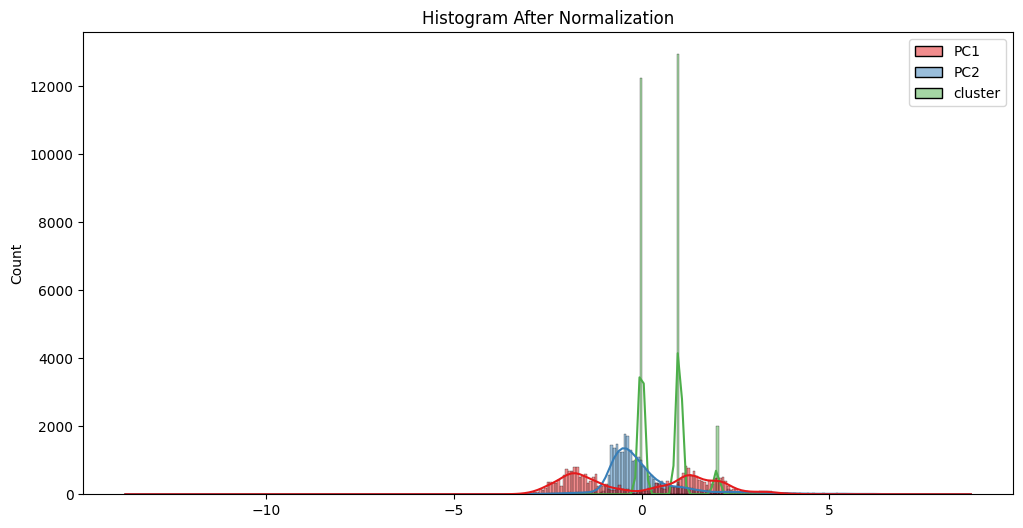

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(pca_df, kde=True, palette="Set1")
plt.title("Histogram After Normalization")
plt.show()

### Time for ML Model Training

In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np


def train_isolation_forest(data, contamination=0.1):

    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(data[['PC1', 'PC2']])
    labels = model.predict(data[['PC1', 'PC2']])


    data['network_condition'] = np.where(labels == 1, 'Good', 'Critical')
    data.loc[labels == -1, 'network_condition'] = 'Critical'

    return model, data

iso_model, pca_df = train_isolation_forest(pca_df)
print(pca_df['network_condition'].value_counts())

network_condition
Good        24452
Critical     2717
Name: count, dtype: int64


In [ ]:
data.isnull().sum()

,0
table,0
dst_ip,0
src_ip,0
ack_rtt_ms,0
avg_latency_ms,0
bandwidth_mbps,0
jitter_ms,0
packet_length_bytes,0
retransmission,0
session_duration_sec,0


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np

def train_isolation_forest_with_three_conditions(data, contamination=0.01):



    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(data[['PC1', 'PC2']])
    labels = model.predict(data[['PC1', 'PC2']])


    data['network_condition'] = 'Normal'


    data.loc[labels == -1, 'network_condition'] = 'Critical'


    data.loc[data['cluster'] == 0, 'network_condition'] = 'Healthy'

    return model, data


iso_model, pca_df = train_isolation_forest_with_three_conditions(pca_df)


print(pca_df['network_condition'].value_counts())


network_condition
Normal      14669
Healthy     12230
Critical      270
Name: count, dtype: int64


In [ ]:
pca_df.isnull().sum()

,0
PC1,0
PC2,0
cluster,0
network_condition,0
network_condition_num,26899


<ipython-input-39-fcdf82395360>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='PC1', y='PC2', hue='network_condition', data=pca_df, palette=['green', 'red'])


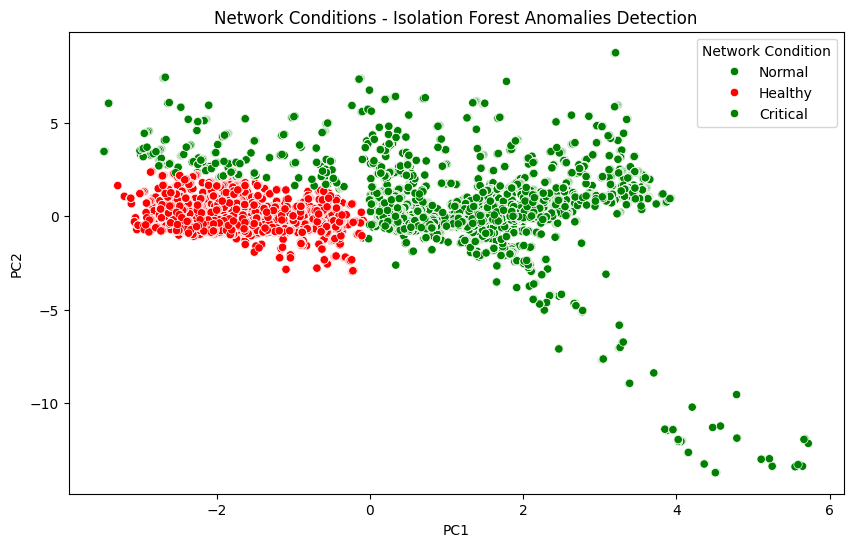

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='network_condition', data=pca_df, palette=['green', 'red'])
plt.title('Network Conditions - Isolation Forest Anomalies Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Network Condition')

In [ ]:
condition_mapping = {'Healthy': 2, 'Normal': 1, 'Critical': -1}
pca_df['network_condition_num'] = pca_df['network_condition'].map(condition_mapping)

# Check for NaN values (optional debugging step)
if pca_df['network_condition_num'].isnull().any():
    print("Warning: NaN values detected in 'network_condition_num'.")

# Calculate the silhouette score
valid_data = pca_df[['PC1', 'PC2']]
sil_score = silhouette_score(valid_data, pca_df['network_condition_num'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.5608785698800115


In [ ]:
import joblib
from google.colab import files

# Save the model
model_filename = 'isolation_forest_model_revised.pkl'
joblib.dump(iso_model, model_filename)

# Download the model
files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.svm import OneClassSVM
import numpy as np

def train_one_class_svm_for_ddos(data, nu=0.001, kernel='rbf'):


    model = OneClassSVM(nu=nu, kernel=kernel, gamma='scale')
    model.fit(data[['PC1', 'PC2']])


    labels = model.predict(data[['PC1', 'PC2']])


    data['condition'] = np.where(labels == 1, 'Normal', 'Anomaly')

    return model, data


svm_model, pca_df = train_one_class_svm_for_ddos(pca_df)

print(pca_df['condition'].value_counts())


condition
Normal     27058
Anomaly      111
Name: count, dtype: int64


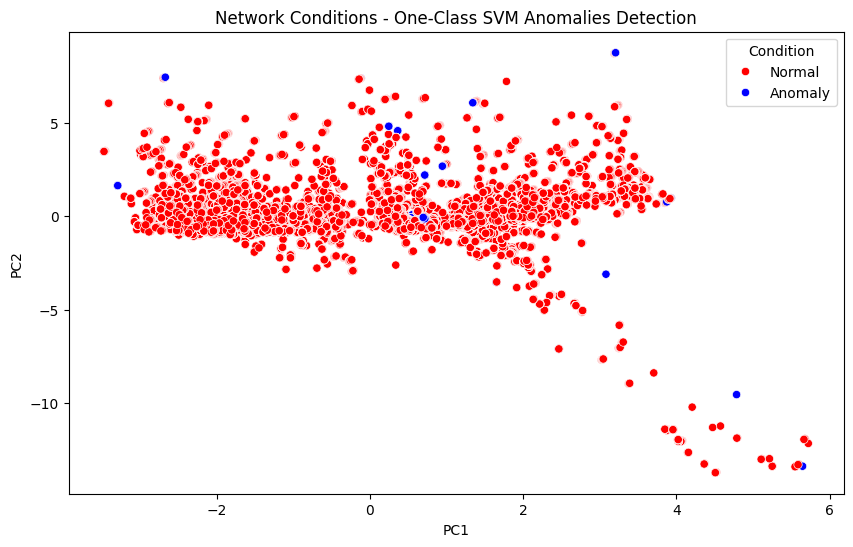

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='condition', data=pca_df, palette=['red', 'blue'])
plt.title('Network Conditions - One-Class SVM Anomalies Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Condition')
plt.show()

In [ ]:
pca_df['condition_num'] = pca_df['condition'].map({'Normal': 1, 'Anomaly': -1})

# Silhouette score for anomaly detection
valid_data = pca_df[['PC1', 'PC2']]
sil_score = silhouette_score(valid_data, pca_df['condition_num'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.29185676304445074


In [ ]:
import joblib
from google.colab import files


model_filename = "one_class_svm_model_revised.pkl"
joblib.dump(svm_model, model_filename)


files.download(model_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
data_filtered = data.iloc[pca_df.index]  # Keep only rows corresponding to pca_df

# Now add the 'avg_latency_ms' column
pca_df['avg_latency_ms'] = data_filtered['avg_latency_ms'].values

In [16]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27169 entries, 0 to 27168
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PC1             27169 non-null  float64
 1   PC2             27169 non-null  float64
 2   cluster         27169 non-null  int32  
 3   avg_latency_ms  27169 non-null  float64
dtypes: float64(3), int32(1)
memory usage: 743.0 KB


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Updated LSTM Model with Regularization and Batch Normalization
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.4):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout, bidirectional=True)
        self.bn = nn.BatchNorm1d(2 * hidden_dim)  # Batch normalization after LSTM
        self.fc = nn.Linear(2 * hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Take the last output (from both directions)
        out = self.bn(out)  # Apply batch normalization
        out = self.fc(out)  # Pass through fully connected layer
        return out

# Hyperparameters
input_dim = 2  # PC1 and PC2
hidden_dim = 64  # Hidden dimension
num_layers = 3  # Increased number of layers
output_dim = 1
learning_rate = 0.001
epochs = 100  # Increased epochs
seq_length = 10
batch_size = 32  # Smaller batch size

# Dataset Preparation (unchanged)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df[['PC1', 'PC2']].values)
y_scaled = scaler.fit_transform(pca_df['avg_latency_ms'].values.reshape(-1, 1)).flatten()

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Dataset class
class LatencyDataset(Dataset):
    def __init__(self, data, labels, seq_length=10):
        self.data = data
        self.seq_length = seq_length
        self.labels = labels

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_length]
        y = self.labels[idx + self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Create Dataset and DataLoader for train, validation, and test sets
train_dataset = LatencyDataset(X_train, y_train, seq_length=seq_length)
val_dataset = LatencyDataset(X_val, y_val, seq_length=seq_length)
test_dataset = LatencyDataset(X_test, y_test, seq_length=seq_length)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize Model, Loss, Optimizer, and Scheduler
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout=0.4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)  # Added weight decay
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

# Training Loop
loss_values, val_loss_values = [], []
early_stopping_patience = 10
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs.squeeze(), y)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
        optimizer.step()
        epoch_loss += loss.item()

    # Validation Loss
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for x, y in val_loader:
            outputs = model(x)
            val_loss += criterion(outputs.squeeze(), y).item()
    val_loss /= len(val_loader)
    val_loss_values.append(val_loss)
    scheduler.step(val_loss)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    epoch_loss /= len(train_loader)
    loss_values.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

# Plot the Loss
plt.plot(loss_values, label='Train Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation on the test set
model.eval()  # Set the model to evaluation mode

# Initialize variables to store predictions and actual values
y_pred = []
y_true = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for x, y in test_loader:
        outputs = model(x)  # Forward pass
        y_pred.append(outputs.squeeze().cpu().numpy())  # Store predictions
        y_true.append(y.cpu().numpy())  # Store true values

# Flatten the lists of predictions and actual values
y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)


mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")


Epoch [1/50], Train Loss: 1.0381, Val Loss: 0.9802


In [ ]:
import torch
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming `model` is your trained LSTM model and X_test, y_test are your test data
# Convert X_test to a PyTorch tensor and move it to the appropriate device (e.g., CUDA or CPU)
X_test_tensor = torch.tensor(X_test).float()  # Convert to float tensor if necessary
X_test_tensor = X_test_tensor.to(device)  # Move to the same device as your model (CPU or CUDA)

# Get predictions from the model
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # No gradient calculation needed for evaluation
    y_pred = model(X_test_tensor)  # Forward pass

# Convert predictions to CPU for use with sklearn metrics
y_pred = y_pred.cpu().numpy().flatten()  # Flatten the predictions for evaluation

# Assuming y_test is the actual values (convert to numpy if needed)
y_test = y_test.numpy()  # Ensure y_test is a numpy array if it's a tensor

# Calculate Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


In [ ]:
if 'avg_latency_ms' in data.columns:
    print(data['avg_latency_ms'].head())
else:
    print("Column 'avg_latency_ms' does not exist!")

0    159.74
1    138.60
2      3.20
3     19.30
4     29.76
Name: avg_latency_ms, dtype: float64


In [ ]:
model_path = 'lstm_model_revised.pth'
torch.save(model.state_dict(), model_path)


from google.colab import files


files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt

# Plot the Actual vs Predicted Latency
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual Latency (avg_latency_ms)', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Latency', color='red', alpha=0.6)
plt.title('Actual vs Predicted Latency')
plt.xlabel('Samples')
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='Actual Latency (avg_latency_ms)', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Latency', color='red', alpha=0.6)
plt.title('Actual vs Predicted Latency')
plt.xlabel('Samples')
plt.ylabel('Latency (ms)')
plt.legend()
plt.show()

Epoch [50/500], Loss: 0.0081
Epoch [100/500], Loss: 0.0015
Epoch [150/500], Loss: 0.0010
Epoch [200/500], Loss: 0.0023
Epoch [250/500], Loss: 0.0019
Epoch [300/500], Loss: 0.0020
Epoch [350/500], Loss: 0.0022
Epoch [400/500], Loss: 0.0006
Epoch [450/500], Loss: 0.0024
Epoch [500/500], Loss: 0.0011


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.0434
R²: 0.8169


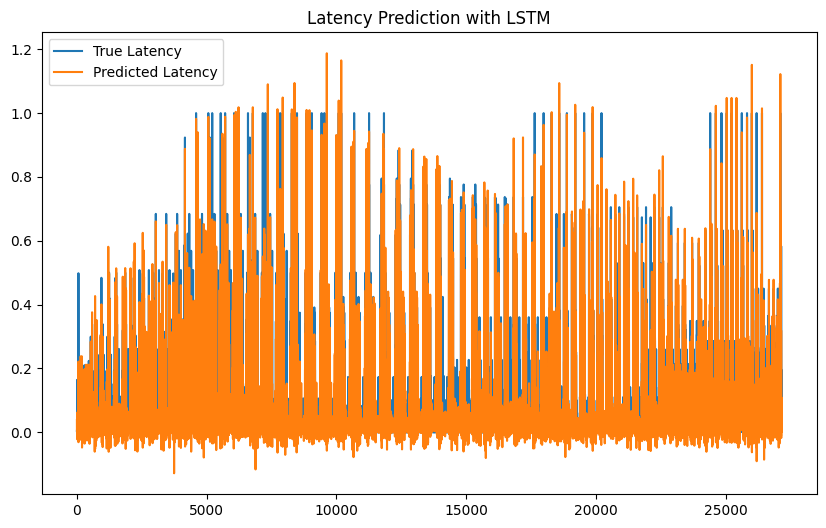

In [17]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Data Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(pca_df[['PC1', 'PC2', 'cluster']].values)
y_scaled = scaler.fit_transform(pca_df['avg_latency_ms'].values.reshape(-1, 1)).flatten()

# Sequence Preparation
window_size = 10  # Length of sequence for LSTM
X_lstm, y_lstm = [], []
for i in range(window_size, len(X_scaled)):
    X_lstm.append(X_scaled[i - window_size:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Convert to PyTorch Tensors
X_lstm_tensor = torch.tensor(X_lstm, dtype=torch.float32)
y_lstm_tensor = torch.tensor(y_lstm, dtype=torch.float32)

# Dataset and DataLoader
dataset = TensorDataset(X_lstm_tensor, y_lstm_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        out = self.fc(hn[-1])
        return out

# Model Initialization
input_size = X_lstm.shape[2]  # Number of features
hidden_size = 50
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 500
for epoch in range(num_epochs):
    for X_batch, y_batch in loader:
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 50 == 0:  # Print loss every 50 epochs
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_lstm_tensor).squeeze().numpy()

# Rescaling Predictions and True Values
y_pred_rescaled = scaler.inverse_transform(np.concatenate(
    (np.zeros((y_pred.shape[0], X_scaled.shape[1] - 1)), y_pred.reshape(-1, 1)), axis=1))[:, -1]
y_true_rescaled = scaler.inverse_transform(np.concatenate(
    (np.zeros((y_lstm.shape[0], X_scaled.shape[1] - 1)), y_lstm.reshape(-1, 1)), axis=1))[:, -1]

# Metrics
rmse = mean_squared_error(y_true_rescaled, y_pred_rescaled, squared=False)
r2 = r2_score(y_true_rescaled, y_pred_rescaled)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_true_rescaled, label='True Latency')
plt.plot(y_pred_rescaled, label='Predicted Latency')
plt.legend()
plt.title("Latency Prediction with LSTM")
plt.show()


In [18]:
model_path = "lstm_model_revised_main.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")



from google.colab import files

# Download the model
files.download(model_path)


Model saved to lstm_model_revised_main.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

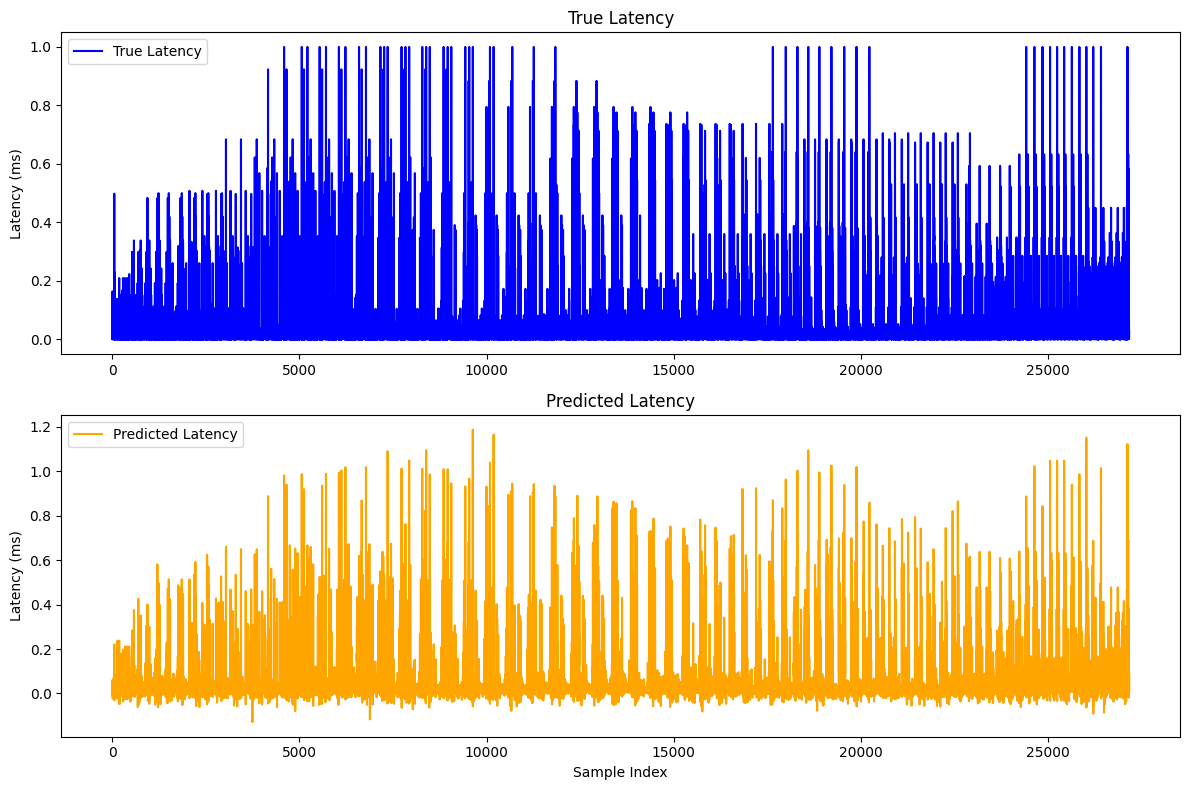

In [19]:
plt.figure(figsize=(12, 8))

# Subplot 1: True Latency
plt.subplot(2, 1, 1)
plt.plot(y_true_rescaled, color='blue', label='True Latency')
plt.title("True Latency")
plt.ylabel("Latency (ms)")
plt.legend()

# Subplot 2: Predicted Latency
plt.subplot(2, 1, 2)
plt.plot(y_pred_rescaled, color='orange', label='Predicted Latency')
plt.title("Predicted Latency")
plt.xlabel("Sample Index")
plt.ylabel("Latency (ms)")
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [20]:
# Save the entire model
torch.save(model, "lstm_complete_model_revised.pth")


from google.colab import files

# Download the model file
files.download("lstm_complete_model_revised.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>